[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/camipass/challenge-telecomx2/blob/main/TelecomX_LATAM.ipynb)

# **Preparación de los datos**

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/df_limpio.csv")

In [145]:
df.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
4256,5996-DAOQL,No,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45
2937,4190-MFLUW,Yes,Female,0,Yes,Yes,10,Yes,No,DSL,...,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35
944,1370-GGAWX,No,Female,0,No,No,46,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,Yes,One year,Yes,Electronic check,94.15,4408.45
3939,5543-QDCRY,No,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,56.40,234.85
1130,1658-TJVOA,No,Female,1,No,No,6,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.10,450.90


Hay dos columnas que no son relevantes para el análisis y se eliminarán:

1. **Columna `customerID`**: Su valor es único en cada fila y no aporta información significativa para el análisis, por lo que será eliminada.

2. **Columna `account.Charges.Total`**: Esta columna contiene información derivada de multiplicar `Charges.Monthly` por `tenure`, por lo que resulta redundante y se eliminará.

In [146]:
df = df.drop(['customerID', 'account.Charges.Total'], axis=1)

In [147]:
for i in df.select_dtypes(include=['object']).columns:
    if len(df[i].unique()) > 2:
       print(f"{i}: {df[i].unique()}")

phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [148]:
columnas = ['account.PaymentMethod', 'account.Contract', 'internet.InternetService']
datos = df.drop(columnas, axis=1)
datos.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity',
       'internet.OnlineBackup', 'internet.DeviceProtection',
       'internet.TechSupport', 'internet.StreamingTV',
       'internet.StreamingMovies', 'account.PaperlessBilling',
       'account.Charges.Monthly'],
      dtype='object')

In [149]:
grupos = { 'No internet service':0,
          'No phone service': 0,
           'No': 0,
           'Yes': 1,
           'Male': 0,
           'Female': 1}
datos = datos.replace(grupos)
datos.head()

/tmp/ipython-input-1762246406.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos = datos.replace(grupos)


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.PaperlessBilling,account.Charges.Monthly
0,0,1,0,1,1,9,1,0,0,1,0,1,1,0,1,65.6
1,0,0,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9
2,1,0,0,0,0,4,1,0,0,0,1,0,0,0,1,73.9
3,1,0,1,1,0,13,1,0,0,1,1,0,1,1,1,98.0
4,1,1,1,1,0,3,1,0,0,0,0,1,1,0,1,83.9


# Encoding
Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding

In [151]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype=int)

columnas_ohe = ohe.fit_transform(df[columnas]).toarray()
df2 = pd.concat([datos, pd.DataFrame(columnas_ohe, columns=ohe.get_feature_names_out(columnas))], axis=1)
df2

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,...,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,internet.InternetService_DSL,internet.InternetService_Fiber optic,internet.InternetService_No
0,0,1,0,1,1,9,1,0,0,1,...,0,0,0,1,0,1,0,1,0,0
1,0,0,0,0,0,9,1,1,0,0,...,0,0,0,1,1,0,0,1,0,0
2,1,0,0,0,0,4,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,1,0,1,1,0,13,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,1,1,1,1,0,3,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,13,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
7039,1,0,0,1,0,22,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
7040,0,0,0,0,0,2,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
7041,0,0,0,1,1,67,1,0,1,0,...,0,0,0,1,0,0,1,1,0,0


In [152]:
churn_counts = df['Churn'].value_counts()
churn_proportion = df['Churn'].value_counts(normalize=True) * 100

print("Churn counts:")
print(churn_counts)
print("\nChurn proportion (%):")
print(churn_proportion)

Churn counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn proportion (%):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


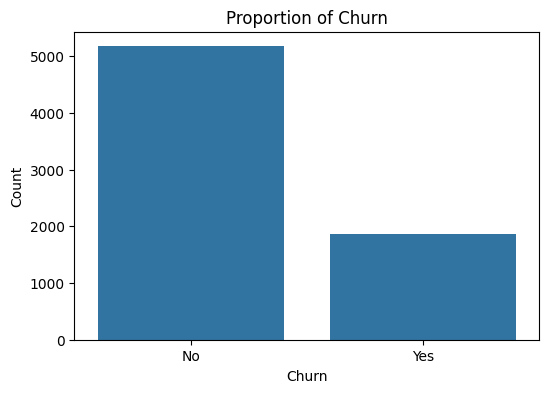

In [154]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Proportion of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

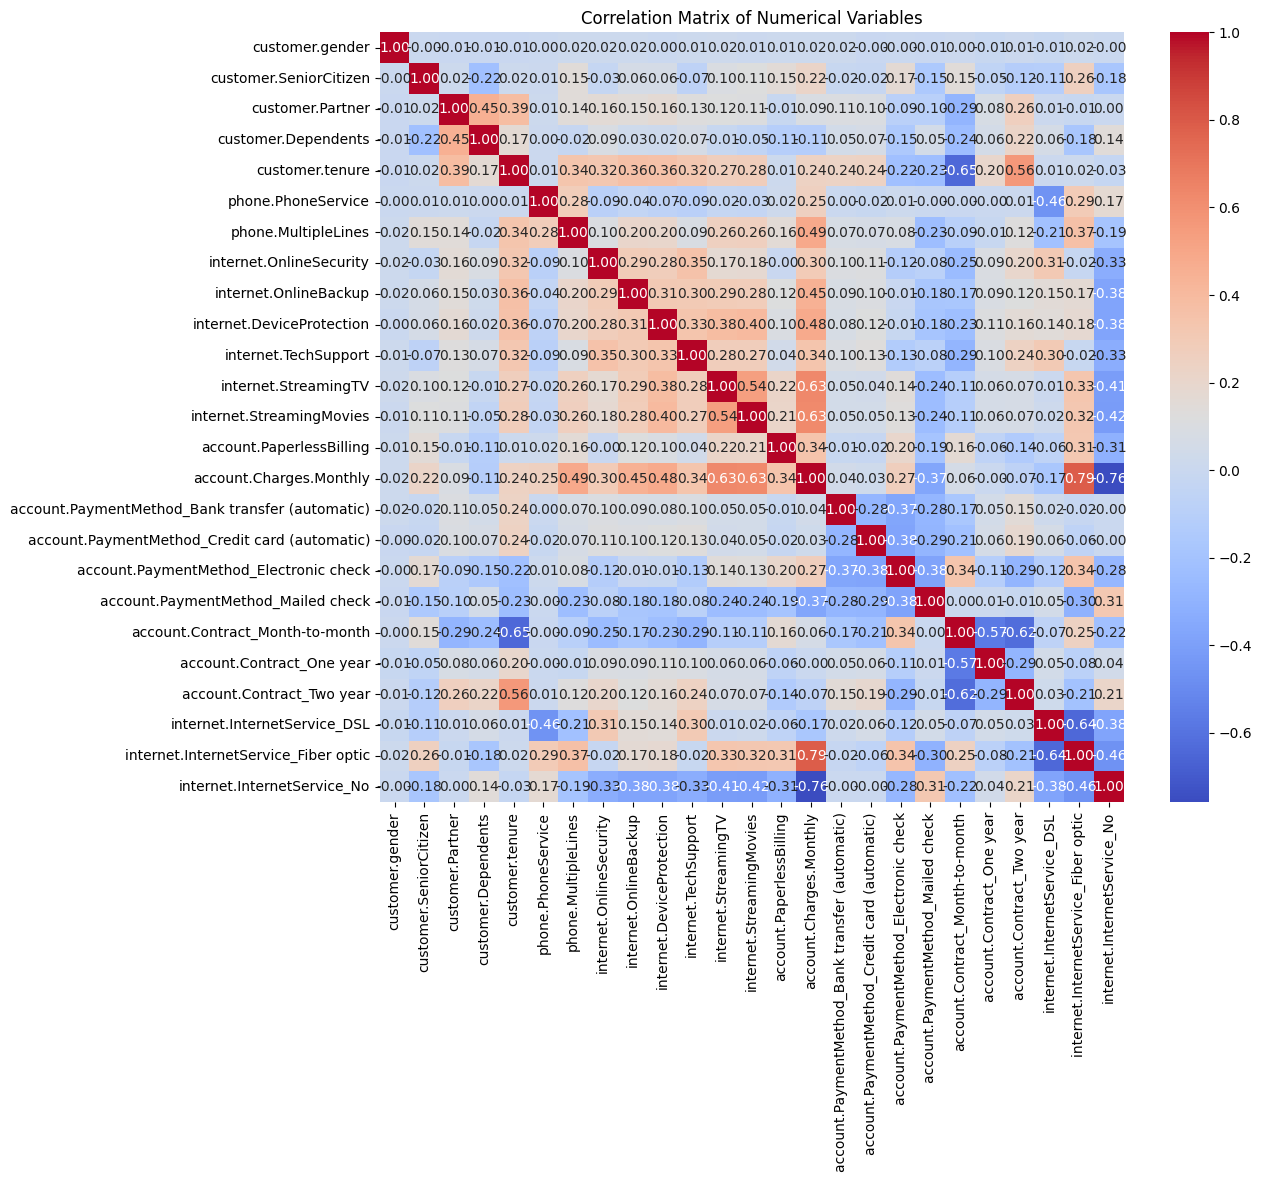

In [157]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

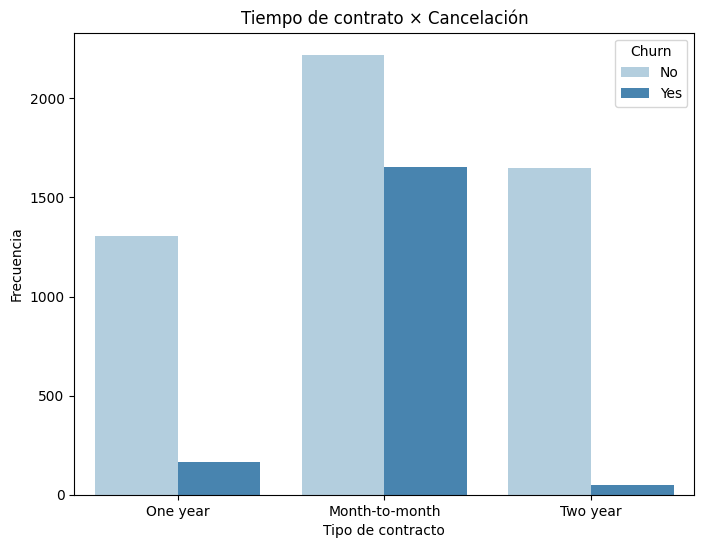

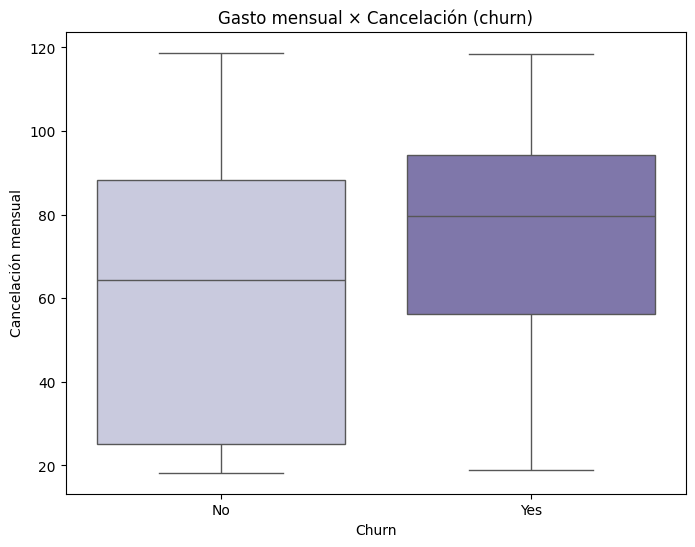

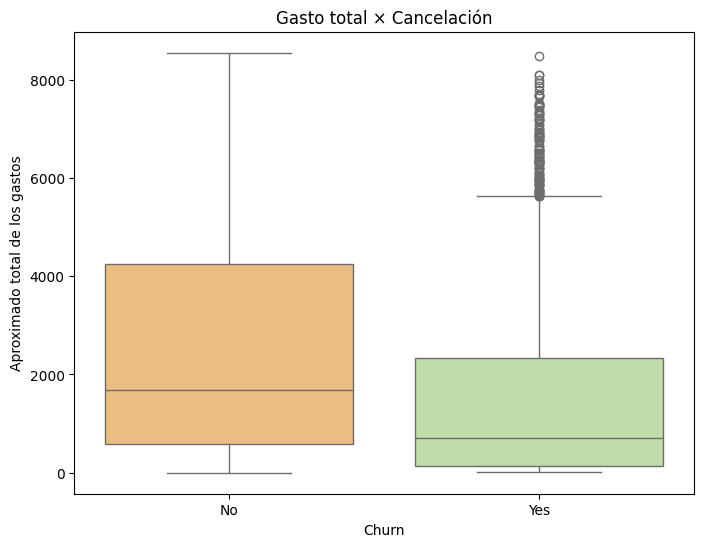

In [170]:
import warnings
warnings.filterwarnings("ignore")

# Relationship between Contract and Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='account.Contract', hue='Churn', data=df, palette='Blues')
plt.title('Tiempo de contrato × Cancelación')
plt.xlabel('Tipo de contracto')
plt.ylabel('Frecuencia')
plt.show()

# Relationship between Monthly Charges and Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Monthly', data=df, palette='Purples')
plt.title('Gasto mensual × Cancelación (churn)')
plt.xlabel('Churn')
plt.ylabel('Cancelación mensual')
plt.show()

# Approximate Total Charges and Relationship with Churn
df['approx_total_charges'] = df['account.Charges.Monthly'] * df['customer.tenure']
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='approx_total_charges', data=df, palette='Spectral')
plt.title('Gasto total × Cancelación')
plt.xlabel('Churn')
plt.ylabel('Aproximado total de los gastos')
plt.show()

# Separación de Datos
Dividir el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo.


In [171]:
from sklearn.model_selection import train_test_split

X = df2.drop('Churn', axis=1)
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5634, 25)
Shape of X_test: (1409, 25)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


# Creación y evaluación de modelo

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Regresión  Logística
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_lr = log_reg_model.predict(X_test)

print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

print("-" * 30)

# Random Forest
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_unscaled, y_train_unscaled)
y_pred_rf = rf_model.predict(X_test_unscaled)

print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test_unscaled, y_pred_rf))
print("Classification Report:\n", classification_report(y_test_unscaled, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_unscaled, y_pred_rf))

Logistic Regression Model Performance:
Accuracy: 0.8048261178140526
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409

Confusion Matrix:
 [[936 100]
 [175 198]]
------------------------------
Random Forest Model Performance:
Accuracy: 0.7856635911994322
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.63      0.45      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.79      0.77      1409

Confusion Matrix:
 [[938  98]
 [204 169]]


## Resumen y comparación de la evaluación del modelo

El rendimiento de los modelos entrenados se evaluó utilizando las siguientes métricas:

**Exactitud (Accuracy):** Corrección global del modelo.

**Precisión (Precision):** Capacidad del modelo para devolver solo instancias relevantes.

**Sensibilidad (Recall):** Capacidad del modelo para recuperar instancias relevantes.

**F1-score:** Media armónica entre precisión y recall.

**Matriz de confusión:** Tabla que resume el rendimiento de un algoritmo de clasificación.

Los resultados para los modelos de Regresión Logística y Random Forest se muestran en la salida de la celda de código anterior.


---





### **Análisis crítico y comparación:**

**Basado en las métricas de evaluación:**

**Regresión Logística** alcanzó una exactitud ligeramente mayor (0.80) en comparación con **Random Forest** (0.79).

**Regresión** **Logística** también muestra mejor precisión (0.66 vs 0.63) y sensibilidad (0.53 vs 0.45) para la clase churn (Sí), resultando en una mayor F1-score (0.59 vs 0.53). Esto sugiere que el modelo de **Regresión** **Logística** es, en este caso, un poco mejor identificando clientes que se dieron de baja.


---




### ¿Underfitting u Overfitting?

Ambos modelos muestran un equilibrio razonable entre precisión y sensibilidad, y la exactitud en el conjunto de test se acerca a lo mostrado en los reportes de clasificación. No hay una indicación clara de sobreajuste o subajuste significativo para ninguno de los modelos basándonos en estos resultados iniciales.

**Sobreajuste** (*overfitting)*: Si un modelo estuviera sobreajustado, esperaríamos ver una exactitud mucho mayor en los datos de entrenamiento en comparación con los de test. Podemos comprobarlo evaluando los modelos sobre el conjunto de entrenamiento si es necesario.

**Subajuste** (*underfitting*): Si un modelo estuviera subajustado, la exactitud y otras métricas serían significativamente bajas tanto en entrenamiento como en test.

En este escenario, **ambos modelos rinden de forma similar**, con R**egresión Logística conservando una leve ventaja** en la predicción de churn. Un análisis adicional —por ejemplo, examinar la curva ROC y el AUC, o realizar validación cruzada— podría aportar mayor detalle sobre su rendimiento y robustez.

# Importancia de las variables de cada modelo

In [177]:
# Variables más relevantes utilizando Regresión Logística
# coeficientes
coefficients = log_reg_model.coef_[0]

feature_importance_lr = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

feature_importance_lr['Abs_Coefficient'] = abs(feature_importance_lr['Coefficient'])
feature_importance_lr = feature_importance_lr.sort_values(by='Abs_Coefficient', ascending=False)

print("Regresión Logística - Las variables más relevantes (con uso de coeficientes)")
display(feature_importance_lr.head(10))

print("-" * 30)

# Variables más importantes - Random Forest
importances_rf = rf_model.feature_importances_

feature_importance_rf = pd.DataFrame({'Feature': X_train_unscaled.columns, 'Importance': importances_rf})

feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

print("Random Forest - Las variables más relevantes")
display(feature_importance_rf.head(10))

Logistic Regression - Top 10 Most Important Features (by absolute coefficient):


,Feature,Coefficient,Abs_Coefficient
21,account.Contract_Two year,-0.900006,0.900006
5,phone.PhoneService,-0.775256,0.775256
24,internet.InternetService_No,-0.764277,0.764277
19,account.Contract_Month-to-month,0.531446,0.531446
23,internet.InternetService_Fiber optic,0.446961,0.446961
10,internet.TechSupport,-0.361683,0.361683
7,internet.OnlineSecurity,-0.354788,0.354788
16,account.PaymentMethod_Credit card (automatic),-0.315400,0.315400
13,account.PaperlessBilling,0.290554,0.290554
6,phone.MultipleLines,0.286845,0.286845


------------------------------
Random Forest - Top 10 Most Important Features:


,Feature,Importance
14,account.Charges.Monthly,0.231020
4,customer.tenure,0.229754
19,account.Contract_Month-to-month,0.071809
17,account.PaymentMethod_Electronic check,0.034527
23,internet.InternetService_Fiber optic,0.034356
0,customer.gender,0.032652
13,account.PaperlessBilling,0.030385
2,customer.Partner,0.026936
7,internet.OnlineSecurity,0.025928
8,internet.OnlineBackup,0.025187


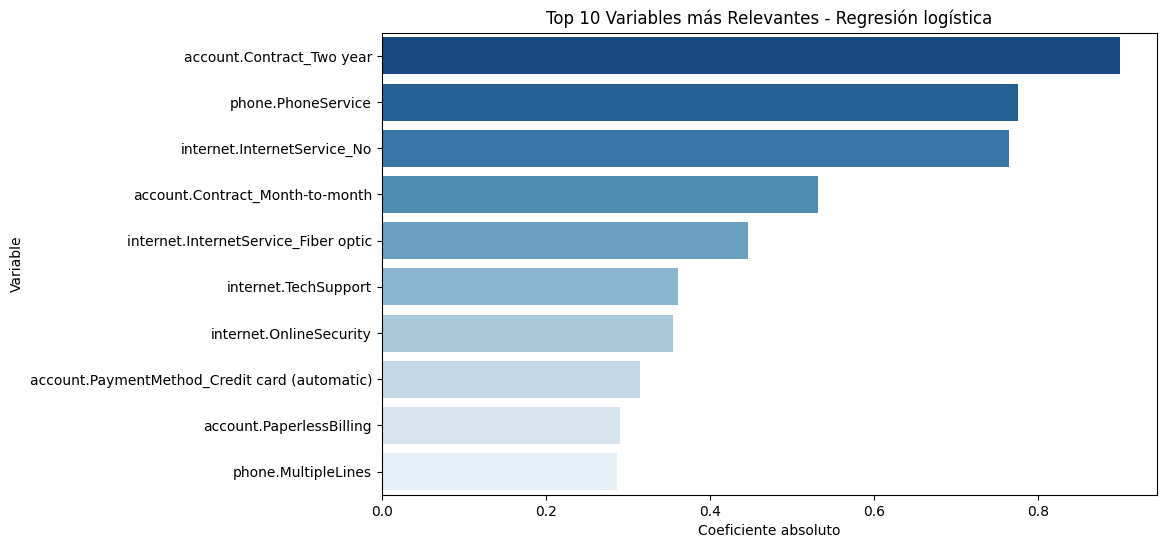

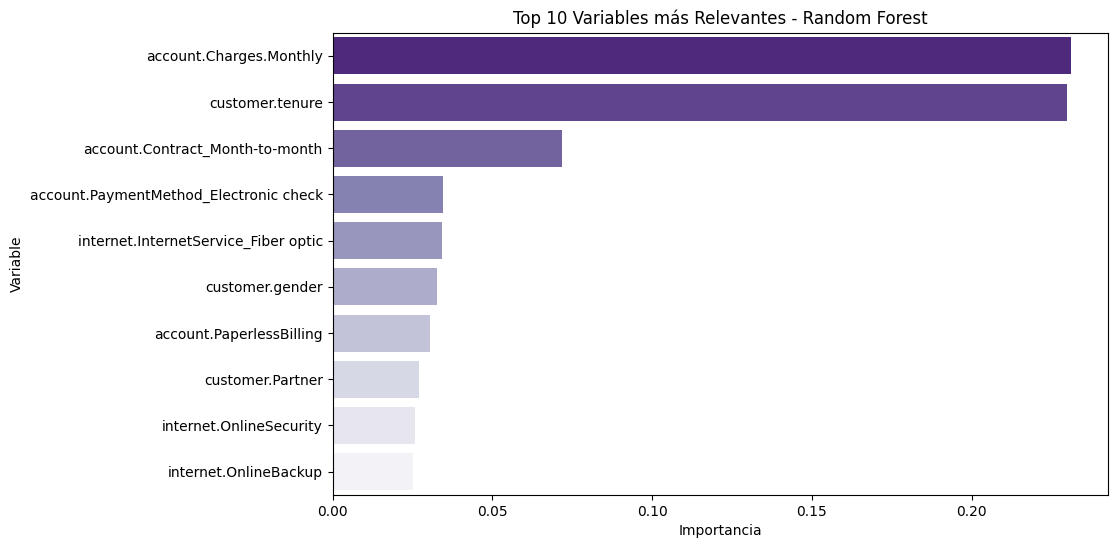

In [182]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance_lr.head(10), palette='Blues_r')
plt.title('Top 10 Variables más Relevantes - Regresión logística')
plt.xlabel('Coeficiente absoluto')
plt.ylabel('Variable')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf.head(10), palette='Purples_r')
plt.title('Top 10 Variables más Relevantes - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

# Informe final

Basado en el análisis del conjunto de datos y el rendimiento de los modelos de **Regresión Logística** y **Random Forest**, los siguientes factores parecen ser los más influyentes para predecir el abandono de clientes (churn):





## **Factores clave que influyen en el churn:**

* **Tipo de contrato:** Ambos modelos resaltan de forma consistente el tipo de contrato como un predictor significativo del churn. Los clientes con contratos mes a mes muestran una mayor propensión a abandonar en comparación con aquellos con contratos a un año o dos años. Esto se observa en los coeficientes de la Regresión Logística y en las importancias de características del Random Forest.
* **Antigüedad (tenure):** La antigüedad del cliente, o el tiempo que lleva con el servicio, es un factor crucial. Una menor antigüedad se asocia generalmente con una mayor probabilidad de churn, según lo indica el modelo Random Forest.
* **Cargos mensuales:** Cargos mensuales más altos también parecen contribuir al churn, como muestra la correlación positiva con el churn en las visualizaciones y su importancia en el modelo Random Forest.
* **Tipo de servicio de Internet:** Los clientes con servicio de Internet por fibra óptica (Fiber Optic) parecen tener una tasa de churn más alta en comparación con los que tienen DSL o sin servicio de Internet. Esto está respaldado por la importancia de la característica en ambos modelos.
* **Seguridad en línea y soporte técnico:** La ausencia de servicios de seguridad en línea y soporte técnico se asocia con una mayor probabilidad de churn, como indican los coeficientes negativos en el modelo de Regresión Logística.
* **Método de pago:** El método de pago, en particular el uso de cheques electrónicos, parece estar relacionado con el churn.


---




## **Rendimiento del modelo:**

Tanto **Regresión Logística** como **Random Forest** tuvieron un desempeño razonable prediciendo churn, con la Regresión Logística mostrando una ligera ventaja en términos de precisión y recall para la clase churn. Ninguno de los dos modelos mostró signos evidentes de sobreajuste o subajuste significativos según las métricas iniciales de evaluación.


---





## **Estrategias de retención propuestas:**

* **Incentivar contratos a largo plazo:** Ofrecer incentivos o descuentos para que los clientes pasen de contratos mes a mes a contratos más largos (un año o dos años). Esto podría ayudar a aumentar la lealtad y reducir el churn.
* **Monitorear a clientes nuevos:** Prestar atención a clientes nuevos, especialmente a los con contratos mes a mes, ya que tienen mayor riesgo de churn. Ofrecer soporte proactivo y experiencias de onboarding personalizadas para mejorar su primera impresión.
* **Atender cargos mensuales elevados:** Analizar los paquetes de servicio de los clientes con cargos mensuales altos que estén en riesgo de churn. Considerar ofrecer planes alternativos o revisar su uso para asegurarse de que estén en la opción más rentable para sus necesidades.
* **Mejorar la experiencia del servicio de fibra óptica:** Investigar posibles problemas o puntos de dolor de los clientes con servicio por fibra óptica. Resolver problemas técnicos o de calidad del servicio para reducir el churn en este segmento.
* **Promover seguridad en línea y soporte técnico:** Resaltar los beneficios de los servicios de seguridad en línea y de soporte técnico para clientes que no los tienen. Considerar paquetes combinados o pruebas gratuitas para fomentar la adopción y mejorar la satisfacción.
* **Optimizar opciones de método de pago:** Si bien los cheques electrónicos se asocian con mayor churn, podría ser necesario investigar más a fondo las causas subyacentes. Asegurar un proceso de pago fluido y sin fricciones para todos los métodos.

Este informe brinda un punto de partida para desarrollar estrategias de retención dirigidas. Un análisis adicional y pruebas A/B de estas estrategias pueden ayudar a optimizar su efectividad para reducir el abandono de clientes.


---